<a href="https://colab.research.google.com/github/nikhilbhide/Machine-Learning/blob/master/clustering/wheat_seeds/k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

# Analyze seeds data and perform segmentation on wheat variety

### https://archive.ics.uci.edu/ml/datasets/seeds# ###


## Introduction
Measurements of geometrical properties of kernels belonging to three different varieties of wheat. A soft X-ray technique and GRAINS package were used to construct all seven, real-valued attributes.

Problem Statement
The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin. Use supervised model to perform clustering of the varieties of wheat.

The dataset is made up of seven geometric parameters of wheat kernels and associated variety.

1. area A
2. perimeter P
3. compactness C = 4*pi*A/P^2
4. length of kernel
5. width of kernel
6. asymmetry coefficient
7. length of kernel groove
8. variety of wheat




## Step 1: Loading the data and basic peripheries

#### Importing the libraries

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [88]:
# Load the dataset
df = pd.read_csv('seeds_dataset.txt', delim_whitespace=True,names=['area','perimeter','compactness','kernel_length','kernel_width','assymetry_coff','kernel_grove_length','variety'])


In [89]:
# Adjust the variety so that later on it would be easier to perform relative comparison with the predicted cluster numbers.
df['variety'] = df['variety'] - 1


## Step 2: Exploratory data analysis *EDA* - Data cleaning and exploration
### a. Cleaning the data

In [90]:
# Find out the shape the dataset
# There are 210 rows with 8 columns
df.shape

(210, 8)

In [91]:
# We do not have any incomplete data
df.isnull().sum()

area                   0
perimeter              0
compactness            0
kernel_length          0
kernel_width           0
assymetry_coff         0
kernel_grove_length    0
variety                0
dtype: int64

### b. Visualizing the data
We have dataset with all numeric and continuous features.

In [92]:
# Take a glance at data
df.head()

,area,perimeter,compactness,kernel_length,kernel_width,assymetry_coff,kernel_grove_length,variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [93]:
# Meticulously inspect the numeric features
df.describe()

,area,perimeter,compactness,kernel_length,kernel_width,assymetry_coff,kernel_grove_length,variety
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,1.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,0.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,0.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,1.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,2.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,2.000000


In [94]:
# Inspect the categorical variables
df.select_dtypes('object').nunique()

Series([], dtype: float64)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


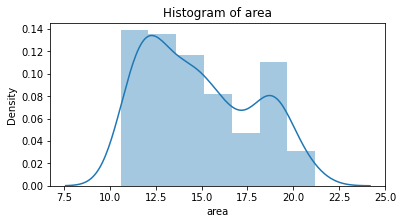

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


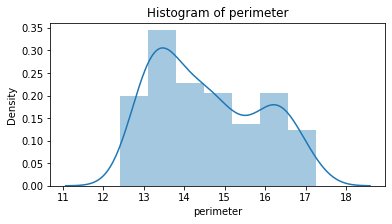

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


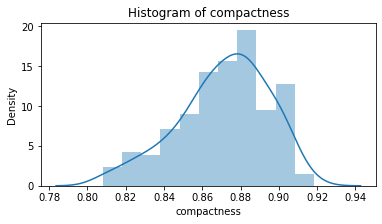

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


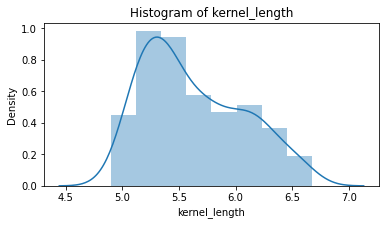

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


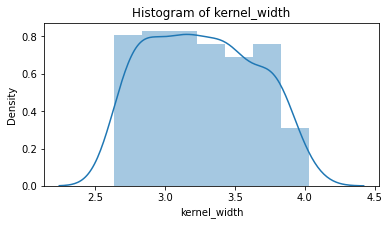

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


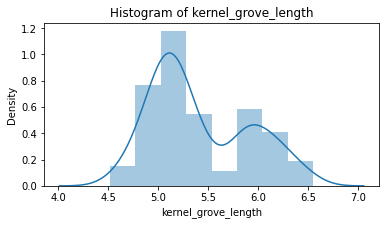

In [95]:
import seaborn as sns

for a in ["area", "perimeter", "compactness","kernel_length","kernel_width","kernel_grove_length"]:
    ax = plt.subplots(figsize=(6, 3))
    ax = sns.distplot(df[a])
    title = "Histogram of " + a
    ax.set_title(title, fontsize=12)
    plt.show()

From the plots above you can observe the distribution of area, perimeter,kernel_length, kerne_width, compactness, and kernel_grove_length. Viewing the histograms can visually indicate characteristics of these features such as the mean or skew. The distribution of kernel length for example reveals that the typical annual income has around 5.0-5.5 USD with left skew.

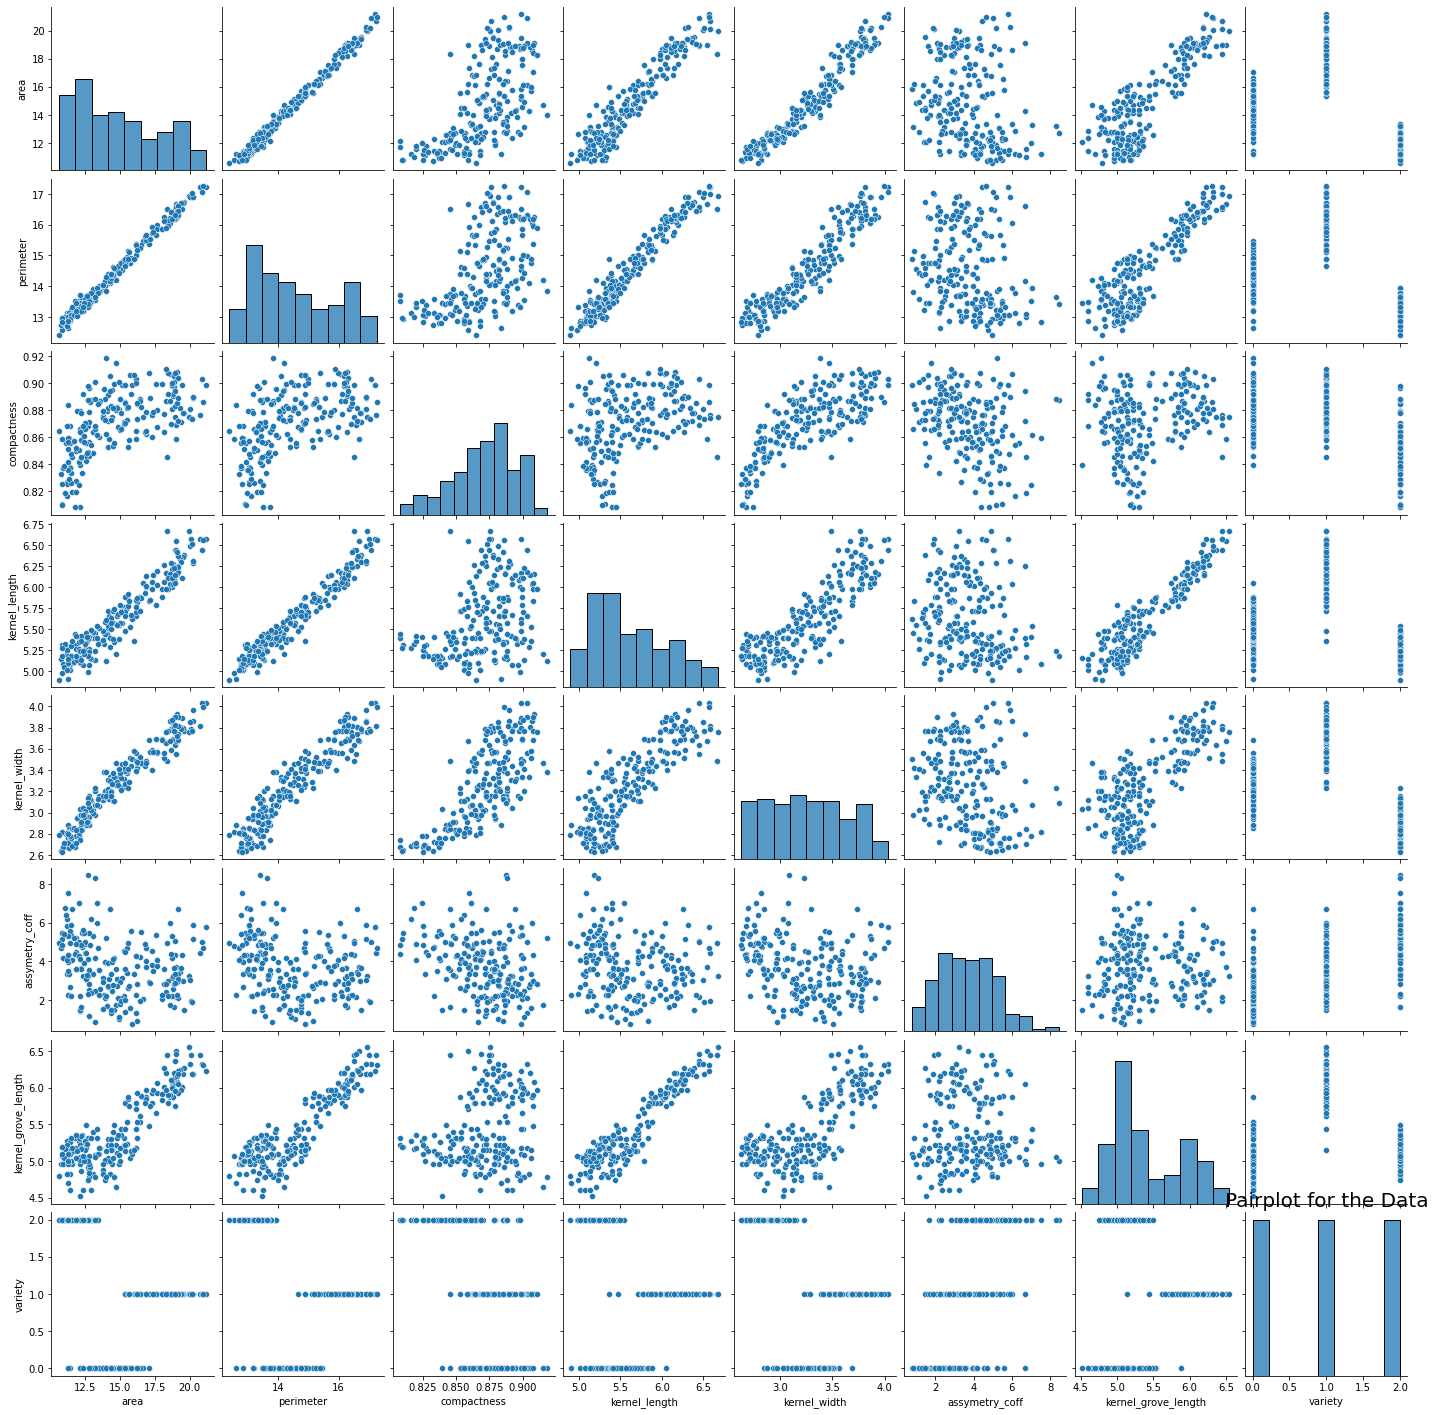

In [96]:
sns.pairplot(df)
plt.title('Pairplot for the Data', fontsize = 20)
plt.show()

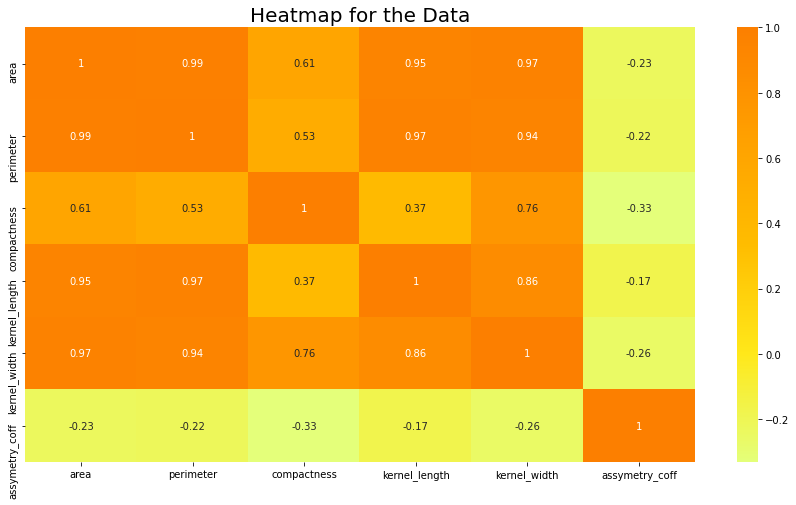

In [97]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(df.iloc[:, range(6)].corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

### c. Feature engineering

As we are going to use Kmeans clustering for this, we need to drop categorical features. KMeans work on eucledian distance and converting categorical columns into numeric ones would not work. In this dataset, we do not have any categorical features. In addition, we are also going to drop the variety, which is label. We will be using variety later to verify our model's accuracy.

In [98]:
X = df.iloc[:, range(6)]

In [99]:
X.head()

,area,perimeter,compactness,kernel_length,kernel_width,assymetry_coff
0,15.26,14.84,0.8710,5.763,3.312,2.221
1,14.88,14.57,0.8811,5.554,3.333,1.018
2,14.29,14.09,0.9050,5.291,3.337,2.699
3,13.84,13.94,0.8955,5.324,3.379,2.259
4,16.14,14.99,0.9034,5.658,3.562,1.355


**Data Scaling**- We need to standardize the scaling of the numerical columns in order to use any distance based analytical methods so that we can compare the relative distances between different feature columns. We can use `minmaxscaler` to transform the numerical columns so that they also fall between 0 and 1.

In [100]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X))
X_scaled.columns = X.columns
X_scaled.index = df.index

We can see that all of our numerical columns now have a min of 0 and a max of 1.

In [101]:
X_scaled.describe()

,area,perimeter,compactness,kernel_length,kernel_width,assymetry_coff
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,0.402032,0.444067,0.570767,0.410773,0.448043,0.381633
std,0.274759,0.269826,0.214423,0.249473,0.269219,0.195498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.158640,0.214876,0.442831,0.204533,0.223806,0.233575
50%,0.355524,0.394628,0.593013,0.351633,0.432644,0.368474
75%,0.634089,0.682851,0.723004,0.608530,0.664113,0.520570
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 3: Data modelling
### a. Dimensionality reduction

We will be using principal component analysis (PCA) to reduce the dimensionality of our data. This method decomposes the data matrix into features that are orthogonal with each other. The resultant orthogonal features are linear combinations of the original feature set. You can think of this method as taking many features and combining similar or redundant features together to form a new, smaller feature set.

In [102]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create a PCA instance: pca
pca = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = pca.fit_transform(X_scaled)


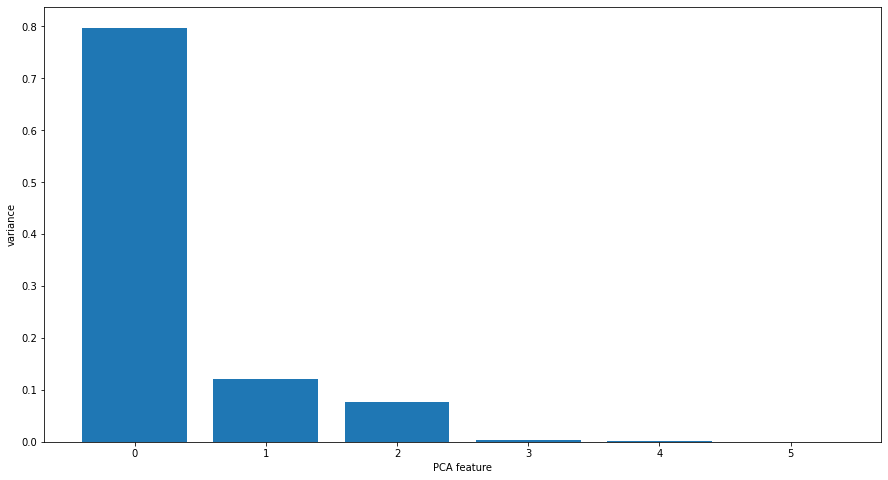

In [103]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [104]:
print(pca.explained_variance_ratio_) # the percentage of the variance

[7.97782915e-01 1.20063309e-01 7.75740747e-02 3.32925184e-03
 1.06498082e-03 1.85469210e-04]


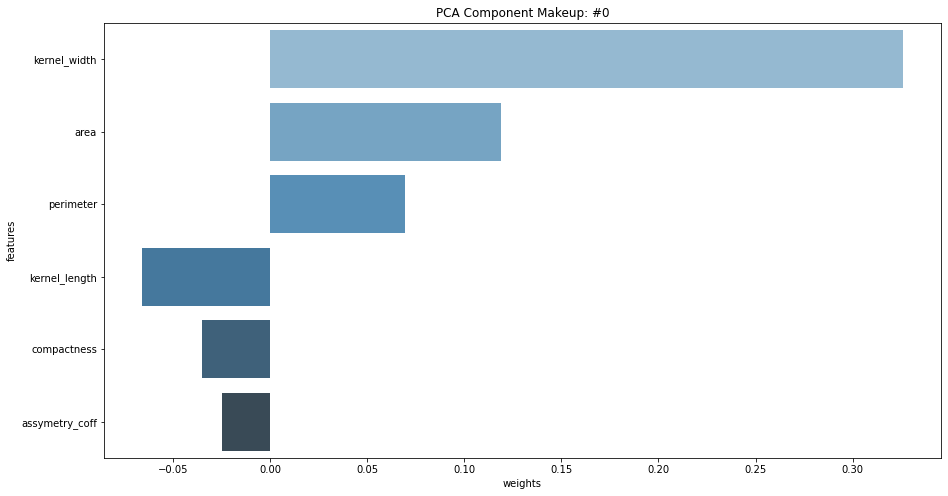

In [105]:
component_num = 0

first_comp = pca_features[:,0]
comps = pd.DataFrame(
    list(zip(first_comp, X_scaled.columns)), columns=["weights", "features"]
)
comps["abs_weights"] = comps["weights"].apply(lambda x: np.abs(x))
ax = sns.barplot(
    data=comps.sort_values("abs_weights", ascending=False).head(10),
    x="weights",
    y="features",
    palette="Blues_d",
)
ax.set_title("PCA Component Makeup: #" + str(component_num))
plt.show()

We can now examine the makeup of each PCA component based on the weightings of the original features that are included in the component. For example, the above code shows the first component. We can see that this component describes an attribute of a wheat kernel that has high kerel_width, area and perimeter plust low kernel_length, compactness, and assymetry_coefficient.

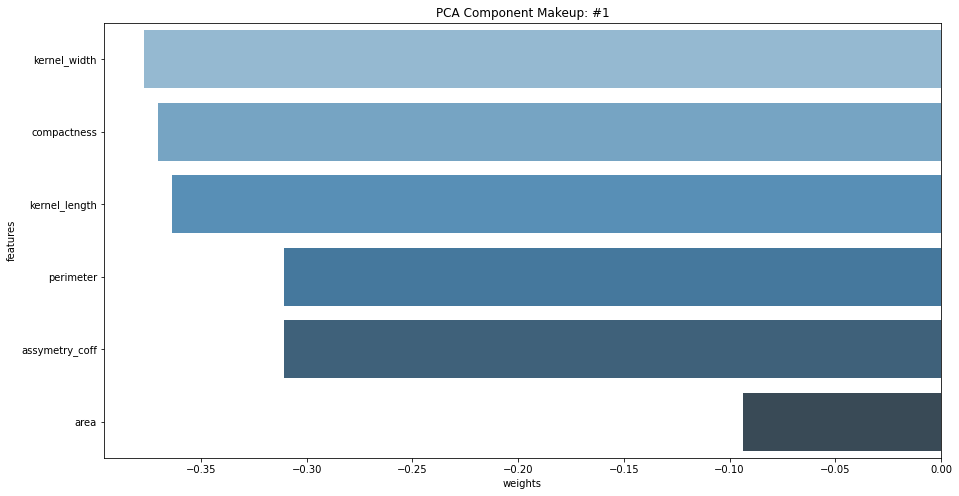

In [106]:
component_num = 1

first_comp = pca_features[:,1]
comps = pd.DataFrame(
    list(zip(first_comp, X_scaled.columns)), columns=["weights", "features"]
)
comps["abs_weights"] = comps["weights"].apply(lambda x: np.abs(x))
ax = sns.barplot(
    data=comps.sort_values("abs_weights", ascending=False).head(10),
    x="weights",
    y="features",
    palette="Blues_d",
)
ax.set_title("PCA Component Makeup: #" + str(component_num))
plt.show()

We can see that this component describes an attribute of a wheat kernel that has low high kerel_width, area, perimeter, low kernel_length, compactness, and assymetry_coefficient.

We can now calculate the variance explained by the largest n components that we want to keep. For this example, let's take the top 5 components.

We can see that the largest 2 components explain ~85% of the total variance in our dataset:

In [107]:
# Create a PCA instance: pca
pca = PCA(n_components=2)

# Apply the fit_transform method of model to grains: pca_features
pca_features = pca.fit_transform(X_scaled)

In [108]:
PCA_list = ["comp_1", "comp_2"]


### b. Mapping N-d to 2-D

We will be using T-SNE to map N-d dimension to 2-D.

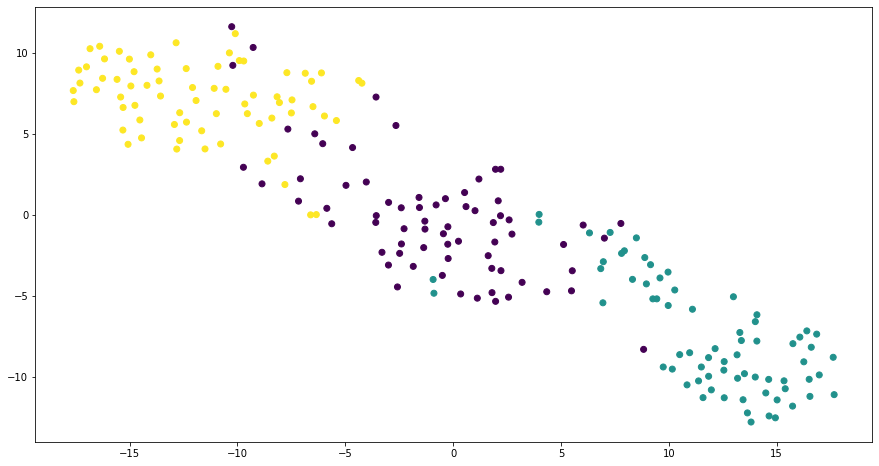

In [109]:
# Use T Stochastic Neighbouring Embedded approach to plot the features in lower dimensions
# Import TSNE
from sklearn.manifold import TSNE 

# Create a TSNE instance: model
model = TSNE(learning_rate=100)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(X_scaled)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.close()
plt.scatter(xs,ys,c=df['variety'])
plt.show()

### C. Wheat variety segmentation using unsupervised clustering

Now, we’ll use the `KMeans` algorithm to segment wheat varieties  by the 2 `PCA` attributes we have created. `KMeans` is a clustering algorithm that identifies clusters of similar counties based on their attributes. 

In [110]:
train_data = pd.DataFrame(data=pca_features,
             index=df.variety,             
             columns=PCA_list)  # 1st row as the column names

In [111]:
train_data.head()

,comp_1,comp_2
variety,,
0,0.118836,-0.093825
0,0.069688,-0.310772
0,-0.034992,-0.370447
0,-0.065821,-0.363652
0,0.325949,-0.376958


First, we call and define the hyperparameters of our KMeans model as we have done with our PCA model. The KMeans algorithm allows the user to specify how many clusters to identify. We will identify ideal number of clusters using elbow-inertia approach.



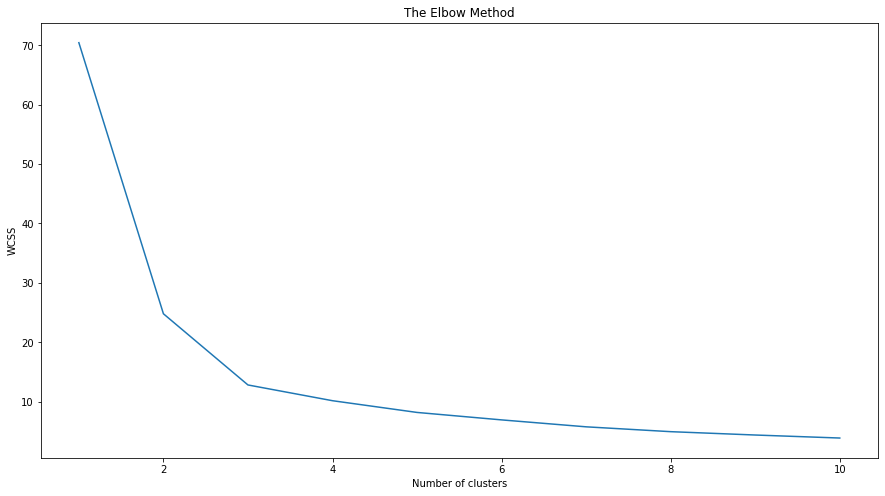

In [112]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(pca_features)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We can clearly notice that ideal number of clusters is 3.

#### Training the K-Means model on the dataset

In [113]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(pca_features)

#### Visualising the clusters

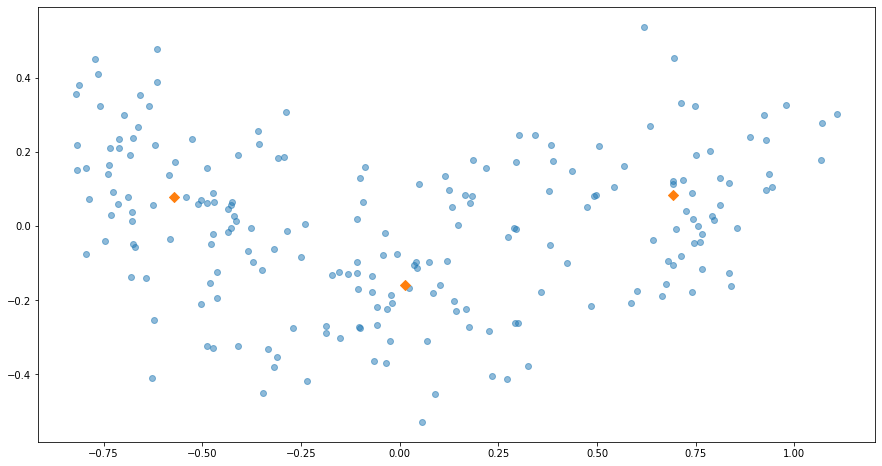

In [114]:
# Import pyplot
import matplotlib.pyplot as plt

# Assign the columns of new_points: xs and ys
xs = pca_features[:,0]
ys = pca_features[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs,ys,alpha=0.5)

# Assign the cluster centers: centroids
centroids = kmeans.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x,centroids_y,marker='D',s=50)

plt.show()


In [115]:
# Create a result DataFrame with labels and customer as columns: df
ct = pd.DataFrame({'wheat_type': train_data.index, 'cluster_labels': y_kmeans})
df['labels'] = y_kmeans

We can see the breakdown of cluster counts and the distribution of clusters.

In [116]:
# Create crosstab: ct
ct = pd.crosstab(df['variety'],df['labels'])

In [117]:
# Display ct
print(ct)

labels    0   1   2
variety            
0        58   2  10
1        10  60   0
2         3   0  67


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


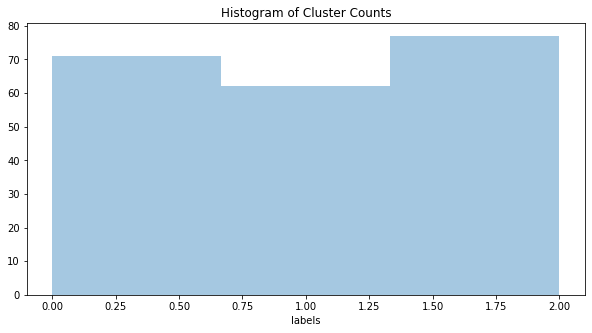

In [118]:
ax = plt.subplots(figsize=(10, 5))
ax = sns.distplot(df['labels'], kde=False)
title = "Histogram of Cluster Counts"
ax.set_title(title, fontsize=12)
plt.show()

## Step 4: Drawing conclusions from our modelling

Explaining the result of the modelling is an important step in making use of our analysis. 
By combining `PCA` and `KMeans`, and the information contained in the model attributes within the trained model, we can form concrete conclusions based on the data.

We can plot a heatmap of the centroids and their location in the transformed feature space. This gives us insight into what characteristics define each cluster. Often with unsupervised learning, results are hard to interpret. This is one way to make use of the results of PCA plus clustering techniques together. Since we were able to examine the makeup of each PCA component, we can understand what each centroid represents in terms of the `PCA` components that we interpreted previously.

For example, we can see that cluster 0 has the average value in the principal component-0 and low value in principal component-1 i.e its kind of balanced. Similarly, cluster 1 has high values in principal component-0 and average value in principal component-1, which represents the fact that this type should have high area, perimeter. Cluster-2 has lowest principal component-0 i.e this type should have low area, perimeter, length etc.

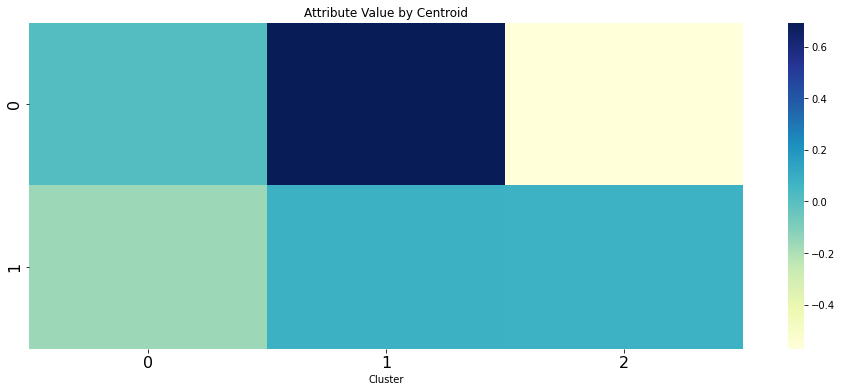

In [119]:
cluster_centroids = kmeans.cluster_centers_
plt.figure(figsize=(16, 6))
ax = sns.heatmap(cluster_centroids.T, cmap="YlGnBu")
ax.set_xlabel("Cluster")
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
ax.set_title("Attribute Value by Centroid")
plt.show()